IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
%matplotlib inline

Exploratory Data Analysis

In [18]:
rfp_reg_2017_csv = 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
df = pd.read_csv(rfp_reg_2017_csv)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
100220,2021-06,YISHUN,5 ROOM,505C,YISHUN ST 51,10 TO 12,112.0,Improved,2016,93 years 10 months,615000.0
100221,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,01 TO 03,181.0,Apartment,1992,69 years 11 months,868000.0
100222,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,63 years 03 months,585000.0
100223,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,146.0,Maisonette,1987,65 years 04 months,600000.0


In [19]:
# Check for null values
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [20]:
# Check the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100225 entries, 0 to 100224
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                100225 non-null  object 
 1   town                 100225 non-null  object 
 2   flat_type            100225 non-null  object 
 3   block                100225 non-null  object 
 4   street_name          100225 non-null  object 
 5   storey_range         100225 non-null  object 
 6   floor_area_sqm       100225 non-null  float64
 7   flat_model           100225 non-null  object 
 8   lease_commence_date  100225 non-null  int64  
 9   remaining_lease      100225 non-null  object 
 10  resale_price         100225 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.4+ MB


In [21]:
# Using only 2021 data as we do not want outdated data for prediction
df_2021 = df[df['month'].str.split('-', expand=True)[0] == "2021"]
df_2021

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
87591,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0
87592,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0
87593,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,54 years 04 months,275888.0
87594,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,56 years 01 month,316800.0
87595,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,10 TO 12,67.0,New Generation,1978,56 years,305000.0
...,...,...,...,...,...,...,...,...,...,...,...
100220,2021-06,YISHUN,5 ROOM,505C,YISHUN ST 51,10 TO 12,112.0,Improved,2016,93 years 10 months,615000.0
100221,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,01 TO 03,181.0,Apartment,1992,69 years 11 months,868000.0
100222,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,63 years 03 months,585000.0
100223,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,146.0,Maisonette,1987,65 years 04 months,600000.0


In [22]:
# To check for duplicates/overlaps
sorted(df_2021['storey_range'].unique())

['01 TO 03',
 '04 TO 06',
 '07 TO 09',
 '10 TO 12',
 '13 TO 15',
 '16 TO 18',
 '19 TO 21',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '31 TO 33',
 '34 TO 36',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [23]:
# To check for number of sales by storey_range
floor_counts = dict(df_2021['storey_range'].value_counts())
floor_counts

{'04 TO 06': 2880,
 '07 TO 09': 2553,
 '10 TO 12': 2272,
 '01 TO 03': 2155,
 '13 TO 15': 1311,
 '16 TO 18': 631,
 '19 TO 21': 271,
 '22 TO 24': 207,
 '25 TO 27': 126,
 '28 TO 30': 59,
 '34 TO 36': 49,
 '31 TO 33': 47,
 '37 TO 39': 41,
 '40 TO 42': 14,
 '43 TO 45': 11,
 '46 TO 48': 6,
 '49 TO 51': 1}

['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15', '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']


<AxesSubplot:>

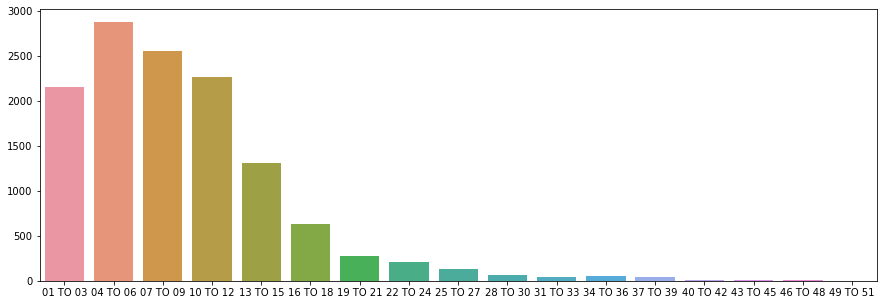

In [24]:
# Plot no. of Sales by storey_range in 2021
x = sorted(list(floor_counts.keys()))
y = [floor_counts[floor_range] for floor_range in x]

print(x)
plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y)

In [25]:
# Use quantiles of number of units sold to put the storey_range into ordinal numbers
numbers = list(range(len(df_2021)))

quantiles = np.round(np.percentile(numbers, [25, 75])).astype(int)
quantiles

array([3158, 9475])

In [26]:
# Define function get_floor_range_from_quantile(quantile)

def get_floor_range_from_quantile(quantile):
  sum = 0
  floor_ranges = sorted(list(floor_counts.keys()))
  for index in range(len(floor_ranges)):   #range(len(floor_ranges)) = range(0, 17)
    floor_range = floor_ranges[index]      # floor_range is individual element inside floor_ranges
    count = floor_counts[floor_range]      # no. of units in each floor range
    sum += count                           # adding values to sum after each loop
    if sum > quantile:                     # value > quantile, next floor belong to next quantile
      return floor_ranges[index + 1]


floor_quantiles = list(map(get_floor_range_from_quantile, quantiles)) # map = for each obj in quantile, apply fx get_floor_range_from_quantile

floor_quantiles


['07 TO 09', '13 TO 15']

In [27]:
# Use encoding to assign ordinal numbers to storey_range
floor_ranges = sorted(list(floor_counts.keys()))

encode_dict = {}
curr_encode = 0
for floor_range in floor_ranges:
  if floor_range in floor_quantiles:
    curr_encode += 1
  encode_dict[floor_range] = curr_encode

encode_dict

{'01 TO 03': 0,
 '04 TO 06': 0,
 '07 TO 09': 1,
 '10 TO 12': 1,
 '13 TO 15': 2,
 '16 TO 18': 2,
 '19 TO 21': 2,
 '22 TO 24': 2,
 '25 TO 27': 2,
 '28 TO 30': 2,
 '31 TO 33': 2,
 '34 TO 36': 2,
 '37 TO 39': 2,
 '40 TO 42': 2,
 '43 TO 45': 2,
 '46 TO 48': 2,
 '49 TO 51': 2}

In [28]:
df_2021_encoded = df_2021.copy()

In [29]:
df_2021_encoded['storey_range'] = df_2021['storey_range'].apply(lambda x: encode_dict[x])

In [31]:
df_2021_encoded

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
87591,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,1,45.0,Improved,1986,64 years 01 month,225000.0
87592,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,0,45.0,Improved,1986,64 years 01 month,211000.0
87593,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,0,73.0,New Generation,1976,54 years 04 months,275888.0
87594,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56 years 01 month,316800.0
87595,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56 years,305000.0
...,...,...,...,...,...,...,...,...,...,...,...
100220,2021-06,YISHUN,5 ROOM,505C,YISHUN ST 51,1,112.0,Improved,2016,93 years 10 months,615000.0
100221,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,0,181.0,Apartment,1992,69 years 11 months,868000.0
100222,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,0,152.0,Maisonette,1985,63 years 03 months,585000.0
100223,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,0,146.0,Maisonette,1987,65 years 04 months,600000.0


In [30]:
high_floor_indices = df_2021[df_2021['storey_range'] == "13 TO 15"].index
high_floor_indices

Int64Index([ 87604,  87651,  87660,  87668,  87671,  87676,  87677,  87679,
             87716,  87721,
            ...
            100090, 100104, 100107, 100133, 100136, 100147, 100149, 100186,
            100189, 100195],
           dtype='int64', length=1311)

In [32]:
df_2021_encoded[df_2021_encoded['storey_range']== 2].index

Int64Index([ 87604,  87651,  87658,  87660,  87664,  87665,  87667,  87668,
             87671,  87672,
            ...
            100104, 100107, 100110, 100133, 100136, 100147, 100149, 100186,
            100189, 100195],
           dtype='int64', length=2774)

In [33]:
df_2021_encoded.loc[high_floor_indices]['storey_range'].value_counts()

2    1311
Name: storey_range, dtype: int64

In [34]:
df_2021_encoded

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
87591,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,1,45.0,Improved,1986,64 years 01 month,225000.0
87592,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,0,45.0,Improved,1986,64 years 01 month,211000.0
87593,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,0,73.0,New Generation,1976,54 years 04 months,275888.0
87594,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56 years 01 month,316800.0
87595,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56 years,305000.0
...,...,...,...,...,...,...,...,...,...,...,...
100220,2021-06,YISHUN,5 ROOM,505C,YISHUN ST 51,1,112.0,Improved,2016,93 years 10 months,615000.0
100221,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,0,181.0,Apartment,1992,69 years 11 months,868000.0
100222,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,0,152.0,Maisonette,1985,63 years 03 months,585000.0
100223,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,0,146.0,Maisonette,1987,65 years 04 months,600000.0


In [35]:
years_cleaned_df = df_2021_encoded.copy()
years_cleaned_df['remaining_lease'] = years_cleaned_df['remaining_lease'].apply(lambda x: x.split()[0])
years_cleaned_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
87591,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,1,45.0,Improved,1986,64,225000.0
87592,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,0,45.0,Improved,1986,64,211000.0
87593,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,0,73.0,New Generation,1976,54,275888.0
87594,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56,316800.0
87595,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56,305000.0


In [36]:
years_cleaned_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
87591,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,1,45.0,Improved,1986,64,225000.0
87592,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,0,45.0,Improved,1986,64,211000.0
87593,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,0,73.0,New Generation,1976,54,275888.0
87594,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56,316800.0
87595,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,1,67.0,New Generation,1978,56,305000.0
...,...,...,...,...,...,...,...,...,...,...,...
100220,2021-06,YISHUN,5 ROOM,505C,YISHUN ST 51,1,112.0,Improved,2016,93,615000.0
100221,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,0,181.0,Apartment,1992,69,868000.0
100222,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,0,152.0,Maisonette,1985,63,585000.0
100223,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,0,146.0,Maisonette,1987,65,600000.0


In [37]:
years_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12634 entries, 87591 to 100224
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12634 non-null  object 
 1   town                 12634 non-null  object 
 2   flat_type            12634 non-null  object 
 3   block                12634 non-null  object 
 4   street_name          12634 non-null  object 
 5   storey_range         12634 non-null  int64  
 6   floor_area_sqm       12634 non-null  float64
 7   flat_model           12634 non-null  object 
 8   lease_commence_date  12634 non-null  int64  
 9   remaining_lease      12634 non-null  object 
 10  resale_price         12634 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


In [38]:
years_cleaned_df['remaining_lease'] = years_cleaned_df['remaining_lease'].astype(int)

In [39]:
years_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12634 entries, 87591 to 100224
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12634 non-null  object 
 1   town                 12634 non-null  object 
 2   flat_type            12634 non-null  object 
 3   block                12634 non-null  object 
 4   street_name          12634 non-null  object 
 5   storey_range         12634 non-null  int64  
 6   floor_area_sqm       12634 non-null  float64
 7   flat_model           12634 non-null  object 
 8   lease_commence_date  12634 non-null  int64  
 9   remaining_lease      12634 non-null  int32  
 10  resale_price         12634 non-null  float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 1.6+ MB


In [40]:
years_cleaned_df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [41]:
selected_features_df = years_cleaned_df[['town', 'storey_range','floor_area_sqm', 'remaining_lease']]

In [42]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12634 entries, 87591 to 100224
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   town             12634 non-null  object 
 1   storey_range     12634 non-null  int64  
 2   floor_area_sqm   12634 non-null  float64
 3   remaining_lease  12634 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 960.2+ KB


In [43]:
X = pd.get_dummies(selected_features_df)
X

,storey_range,floor_area_sqm,remaining_lease,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
87591,1,45.0,64,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87592,0,45.0,64,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87593,0,73.0,54,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87594,1,67.0,56,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87595,1,67.0,56,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100220,1,112.0,93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100221,0,181.0,69,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100222,0,152.0,63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100223,0,146.0,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
y = years_cleaned_df['resale_price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
model = RandomForestRegressor()
model.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [47]:
model.score(X_test, y_test)

0.924796459246783